<a href="https://colab.research.google.com/github/hanhanwu/Hanhan_COLAB_Experiemnts/blob/master/SVD_application.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Image Compression

In [3]:
# mount drive

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
from google.colab.patches import cv2_imshow

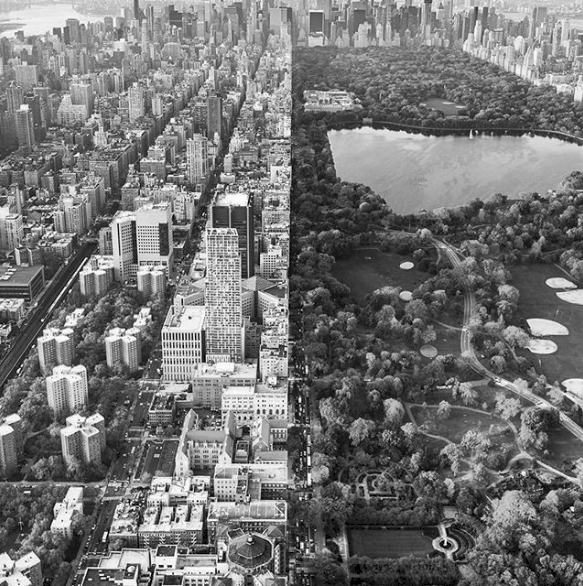

In [0]:
img1 = cv2.imread('drive/My Drive/Colab Notebooks/NY.PNG', 0)
cv2_imshow(img1)

In [0]:
U, S, VT = np.linalg.svd(img1)

In [0]:
print(U.shape, S.shape, VT.shape)

(586, 586) (583,) (583, 583)


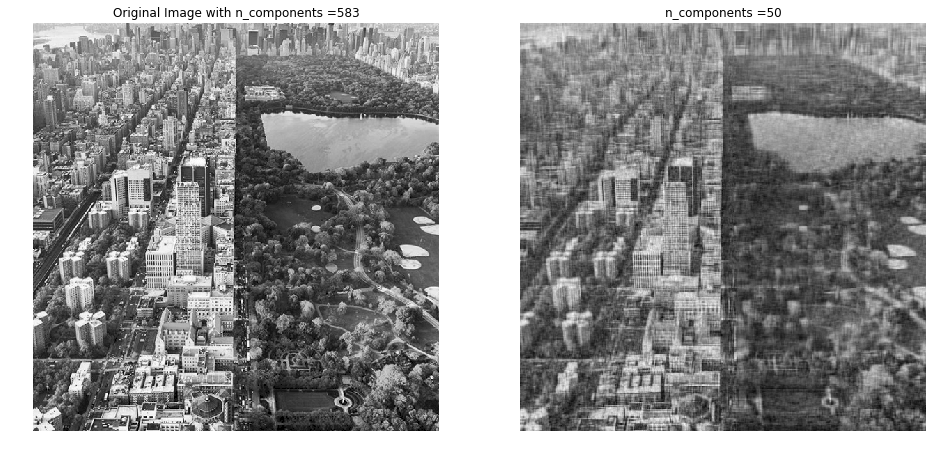

In [0]:
plt.figure(figsize = (16, 8))
comps = [583, 50]

for i in range(2):
  low_rank = U[:, :comps[i]] @ np.diag(S[:comps[i]]) @ VT[:comps[i], :]
  if(i  == 0):
     plt.subplot(1, 2, i+1), plt.imshow(low_rank, cmap = 'gray'), \
      plt.axis('off'), plt.title("Original Image with n_components =" + \
                                 str(comps[i]))
  else:
     plt.subplot(1, 2, i+1), plt.imshow(low_rank, cmap = 'gray'), \
      plt.axis('off'), plt.title("n_components =" + str(comps[i]))

### NOTES - Better Not to use Colored Photo to Compress with SVD

As you can see below, when it's colored photo, `VT` won't have enough dimension to be used
in decomposition, but only with U and S, the compression won't be good

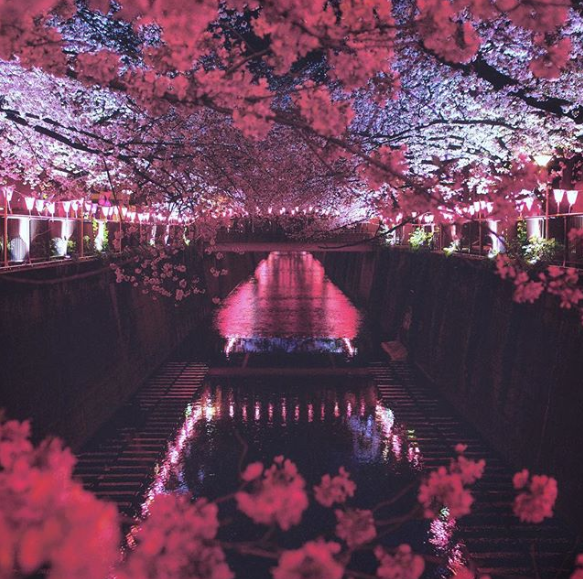

In [79]:
img2 = cv2.imread('drive/My Drive/Colab Notebooks/dark_night.PNG', cv2.IMREAD_COLOR)
cv2_imshow(img2)

In [0]:
U, S, VT = np.linalg.svd(img2)

In [81]:
print(U.shape, S.shape, VT.shape)

(579, 583, 583) (579, 3) (579, 3, 3)


(579, 579)
(100, 100)


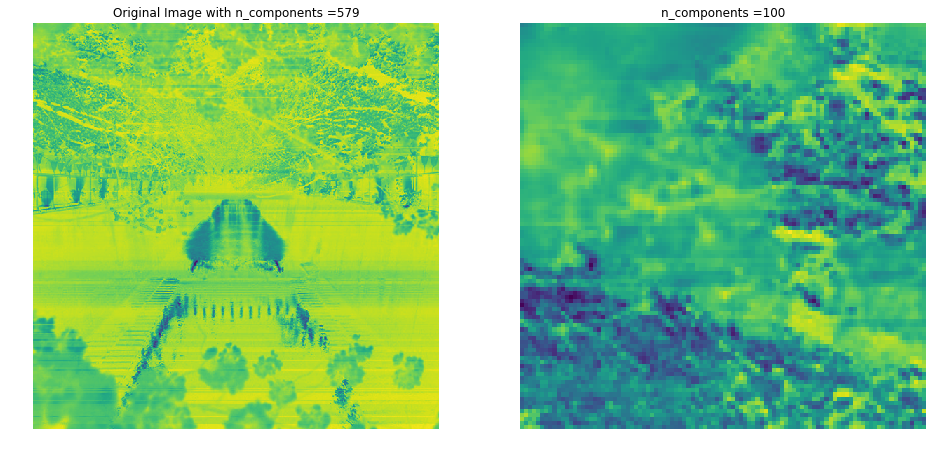

In [92]:
plt.figure(figsize = (16, 8))
comps = [579, 100]

for i in range(2):
  low_rank = U[:comps[i], :comps[i], :3] @ np.diag(S[:comps[i], :])
  print(low_rank.shape)
  if(i  == 0):
     plt.subplot(1, 2, i+1), plt.imshow(low_rank), \
      plt.axis('off'), plt.title("Original Image with n_components =" + \
                                 str(comps[i]))
  else:
     plt.subplot(1, 2, i+1), plt.imshow(low_rank), \
      plt.axis('off'), plt.title("n_components =" + str(comps[i]))

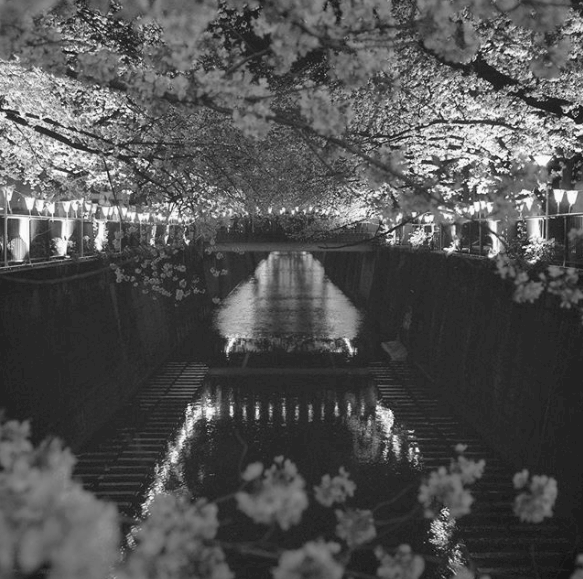

In [71]:
img2 = cv2.imread('drive/My Drive/Colab Notebooks/dark_night.PNG', 0)
cv2_imshow(img2)

In [0]:
U, S, VT = np.linalg.svd(img2)

In [73]:
print(U.shape, S.shape, VT.shape)

(579, 579) (579,) (583, 583)


(579, 579)
(579,)
(579, 583)

(579, 50)
(50,)
(50, 583)



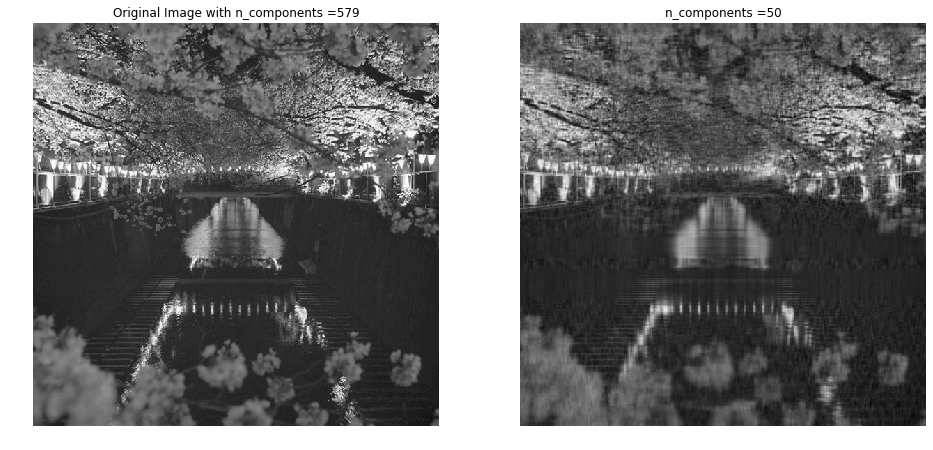

In [74]:
plt.figure(figsize = (16, 8))
comps = [579, 50]

for i in range(2):
  print(U[:, :comps[i]].shape)
  print(S[:comps[i]].shape)
  print(VT[:comps[i]].shape)
  low_rank = U[:, :comps[i]] @ np.diag(S[:comps[i]]) @ VT[:comps[i], :]
  print()
  if(i  == 0):
     plt.subplot(1, 2, i+1), plt.imshow(low_rank, cmap = 'gray'), \
      plt.axis('off'), plt.title("Original Image with n_components =" + \
                                 str(comps[i]))
  else:
     plt.subplot(1, 2, i+1), plt.imshow(low_rank, cmap = 'gray'), \
      plt.axis('off'), plt.title("n_components =" + str(comps[i]))